Loadin the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)
print(df.head(10))



  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

Task 3.1: Data Exploration and Understanding

ii)Identify the number of rows and columns in the dataset.


In [ ]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


Number of rows: 143
Number of columns: 9


iii) List all the columns and their data types.

In [ ]:
print(df.dtypes)



Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


2. Basic Statistics
i)Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
mean = df['score'].mean()
median = df['score'].median()
stddev = df['score'].std()

print(f"Mean Score: {mean}")
print(f"Median Score: {median}")
print(f"Standard Deviation of Score: {stddev}")


Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


ii) Identify the country with the highest and lowest happiness scores.

In [ ]:
highestscorecountry = df.loc[df['score'].idxmax()]['Country name']
lowestscorecountry = df.loc[df['score'].idxmin()]['Country name']

print(f"Country with highest happiness score: {highestscorecountry}")
print(f"Country with lowest happiness score: {lowestscorecountry}")


Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


3. Missing Values
i) Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
missingvalues = df.isnull().sum()
print(missingvalues)


Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


4. Filtering and Sorting
i) Filter the dataset to show only the countries with a score greater than 7.5.

In [ ]:
highscorecountries = df[df['score'] > 7.5]
print(highscorecountries)



  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


ii) Sort the filtered dataset by gdp per capita in descending order and display the top 10 rows.

In [ ]:

sortedbygdp = df.sort_values(by='Log GDP per capita', ascending=False)

# Display the top 10 rows
print("Top 10 rows sorted by GDP per Capita:")
print(sortedbygdp.head(10))


Top 10 rows sorted by GDP per Capita:
                 Country name  score  Log GDP per capita  Social support  \
7                  Luxembourg  7.122               2.141           1.355   
16                    Ireland  6.838               2.129           1.390   
29                  Singapore  6.523               2.118           1.361   
21       United Arab Emirates  6.733               1.983           1.164   
8                 Switzerland  7.060               1.970           1.425   
6                      Norway  7.302               1.952           1.517   
22              United States  6.725               1.939           1.392   
85  Hong Kong S.A.R. of China  5.316               1.909           1.184   
1                     Denmark  7.583               1.908           1.520   
5                 Netherlands  7.319               1.901           1.462   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
7                     0.708                         

5. Adding New Columns
i) Create a new column called happinesscategory that categorizes countries into three categories based on their score:

In [ ]:
def categorizehappiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['happinesscategory'] = df['score'].apply(categorizehappiness)
print(df[['Country name', 'score', 'happinesscategory']].head(10))


  Country name  score happinesscategory
0      Finland  7.741              High
1      Denmark  7.583              High
2      Iceland  7.525              High
3       Sweden  7.344              High
4       Israel  7.341              High
5  Netherlands  7.319              High
6       Norway  7.302              High
7   Luxembourg  7.122              High
8  Switzerland  7.060              High
9    Australia  7.057              High


2: Data Visualizations
1) Bar Plot: Plot the top 10 happiest countries by score using a bar chart.

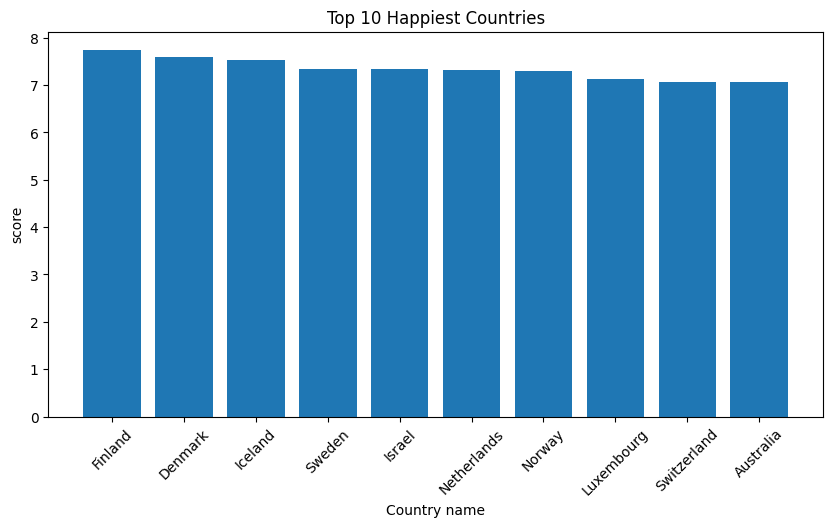

In [ ]:
import matplotlib.pyplot as plt

top10happiest = df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top10happiest['Country name'], top10happiest['score'])
plt.xlabel('Country name')
plt.ylabel('score')
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=45)
plt.show()


2) Line Plot: Plot the top 10 unhappiest countries by score using a line chart.


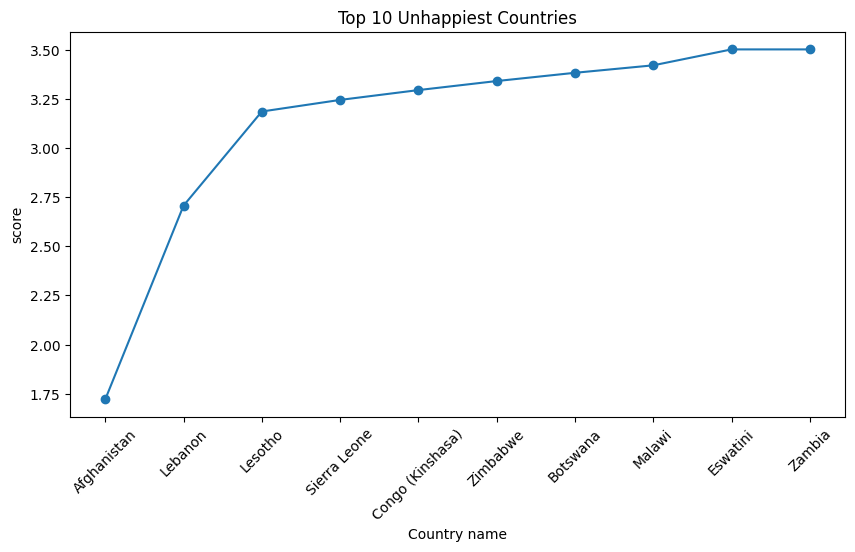

In [ ]:
top10unhappiest = df.sort_values(by='score').head(10)
plt.figure(figsize=(10, 5))
plt.plot(top10unhappiest['Country name'], top10unhappiest['score'], marker='o')
plt.xlabel('Country name')
plt.ylabel('score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.show()


3) Plot a histogram for the Happiness Score column to show its distribution and interpret it.

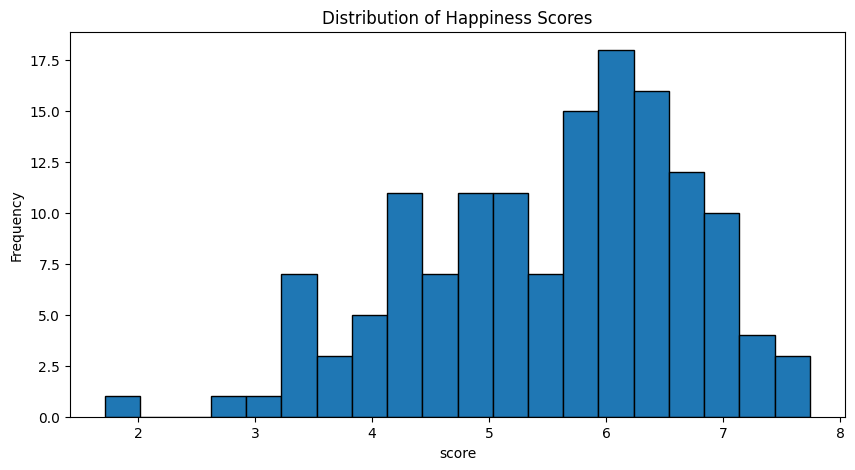

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['score'], bins=20, edgecolor='k')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()


4) Scatter Plot: Plot a scatter plot between GDP per Capita and Happiness Score to visualize their relationship.

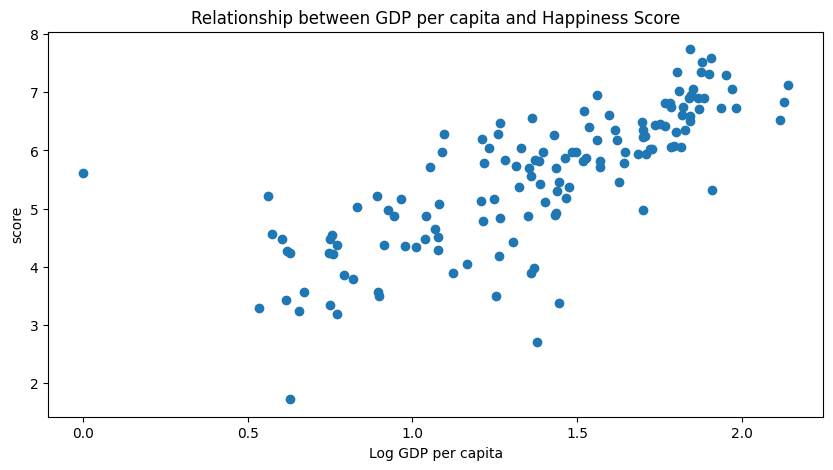

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Log GDP per capita'], df['score'])
plt.xlabel('Log GDP per capita')
plt.ylabel('score')
plt.title('Relationship between GDP per capita and Happiness Score')
plt.show()


Task 3.2: Setup Task - Preparing the South-Asia Dataset

1: Define the countries in South Asia

In [ ]:
southasian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]


2: Filter the dataset to include only these countries

In [ ]:
southasia_df = df[df['Country name'].isin(southasian_countries)]
print(southasia_df)


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

3: Save the filtered dataframe as a separate CSV **file**

In [ ]:
southasia_df.to_csv('SouthAsiaHappinessReport.csv', index=False)


Task 2: Composite Score Ranking
 1: Create a new column called Composite Score

In [ ]:
southasia_df = df[df['Country name'].isin(southasian_countries)].copy()
southasia_df['Composite Score'] = (
    0.40 * southasia_df['Log GDP per capita'] +
    0.30 * southasia_df['Social support'] +
    0.30 * southasia_df['Healthy life expectancy']
)
print("South Asia DataFrame with Composite Score:")
print(southasia_df[['Country name', 'Composite Score']])


South Asia DataFrame with Composite Score:
    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238


2: Rank the South Asian countries based on the Composite Score in descending order

In [ ]:
southasia_df = southasia_df.sort_values(by='Composite Score', ascending=False)
print(southasia_df[['Country name', 'Composite Score']])

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


3:Visualize the top 5 countries using a horizontal bar chart showing the Composite Score

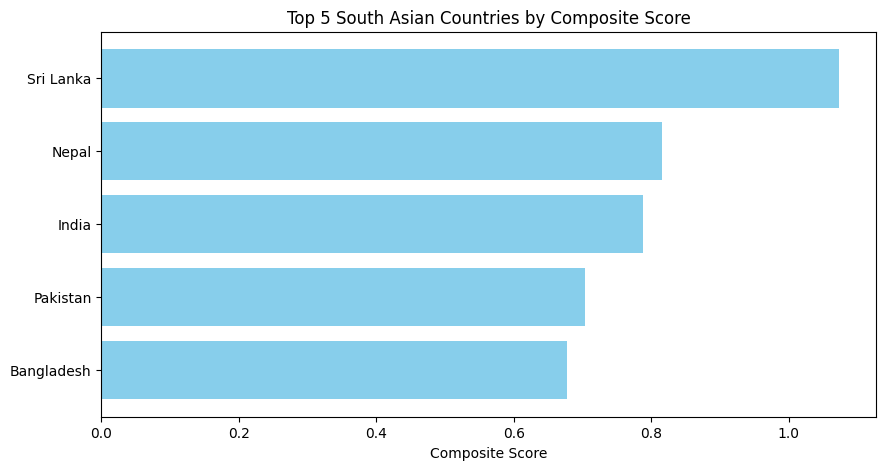

In [ ]:
top5_composite = southasia_df.head(5)
plt.figure(figsize=(10, 5))
plt.barh(top5_composite['Country name'], top5_composite['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()


4: Discuss whether the rankings based on the Composite Score align with the original Happiness Score

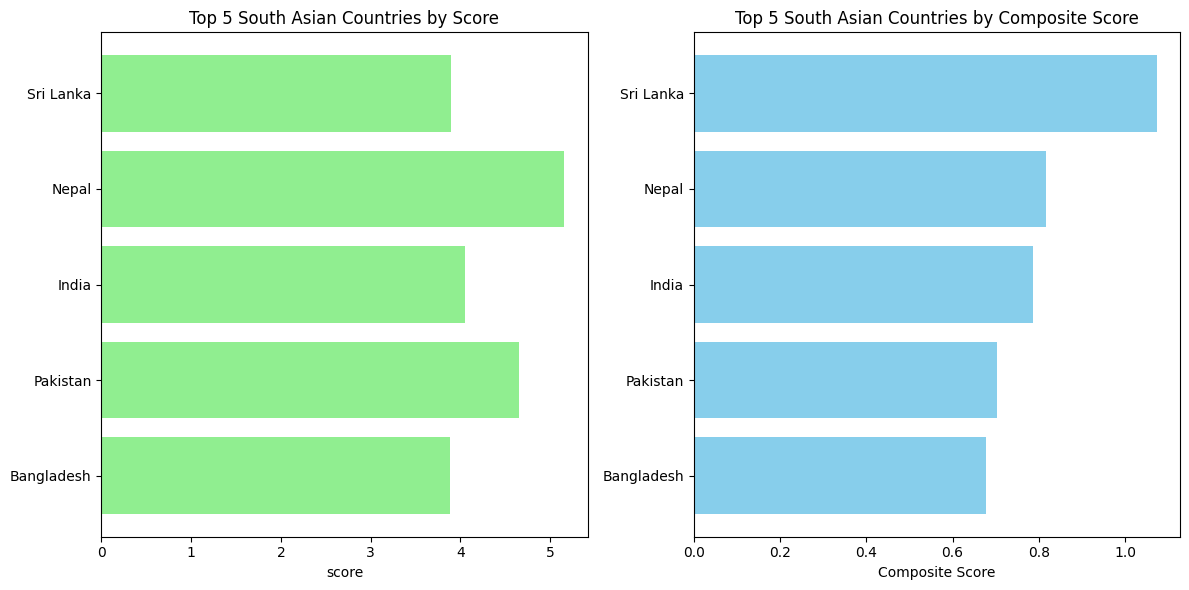

In [ ]:
plt.figure(figsize=(12, 6))

# Bar plot for Original Happiness Score
plt.subplot(1, 2, 1)
plt.barh(top5_composite['Country name'], top5_composite['score'], color='lightgreen')
plt.xlabel('score')
plt.title('Top 5 South Asian Countries by Score')
plt.gca().invert_yaxis()

# Bar plot for Composite Score
plt.subplot(1, 2, 2)
plt.barh(top5_composite['Country name'], top5_composite['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Task 3 : Outlier Detection

In [ ]:
# Define a function to identify outliers using the IQR method
def identify_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# South Asian countries
southasian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
southasia_df = df[df['Country name'].isin(southasian_countries)].copy()

# Identify outliers
southasia_outliers_score = identify_outliers(southasia_df, 'score')
southasia_outliers_gdp = identify_outliers(southasia_df, 'Log GDP per capita')

print("South Asia Outliers - score:")
print(southasia_outliers_score[['Country name', 'score']])

print("South Asia Outliers - Log GDP per Capita:")
print(southasia_outliers_gdp[['Country name', 'Log GDP per capita']])


South Asia Outliers - score:
    Country name  score
142  Afghanistan  1.721
South Asia Outliers - Log GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.


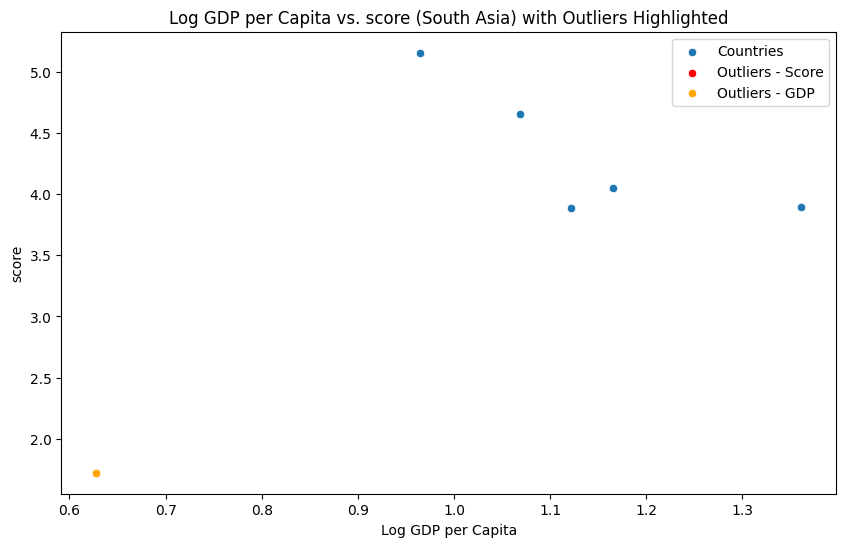

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=southasia_df, x='Log GDP per capita', y='score', label='Countries')
sns.scatterplot(data=southasia_outliers_score, x='Log GDP per capita', y='score', color='red', label='Outliers - Score')
sns.scatterplot(data=southasia_outliers_gdp, x='Log GDP per capita', y='score', color='orange', label='Outliers - GDP')
plt.title('Log GDP per Capita vs. score (South Asia) with Outliers Highlighted')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.legend()
plt.show()


Discuss outlier characteristics and impact
Characteristics: Outliers are data points significantly different from others. In this context, countries with exceptionally high or low scores or GDP per capita values are highlighted.

Impact: Outliers can skew regional averages, making the region appear wealthier or poorer or having higher or lower overall happiness scores.


Task 4 Exploring Trends Across Metrics: i) Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [ ]:
metrics = ['Freedom to make life choices', 'Generosity']
# Calculate Pearson correlation with Score
correlations = southasia_df[metrics + ['score']].corr(method='pearson')['score']
print(correlations)


Freedom to make life choices    0.800519
Generosity                      0.874512
score                           1.000000
Name: score, dtype: float64


ii)Create scatter plots with trendlines for these metrics against the Score.

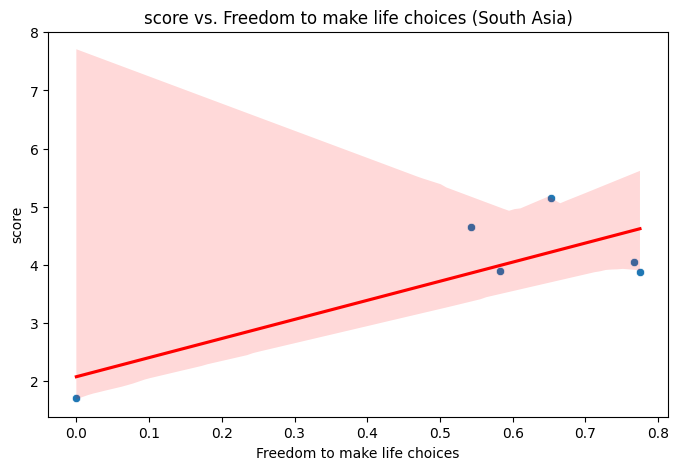

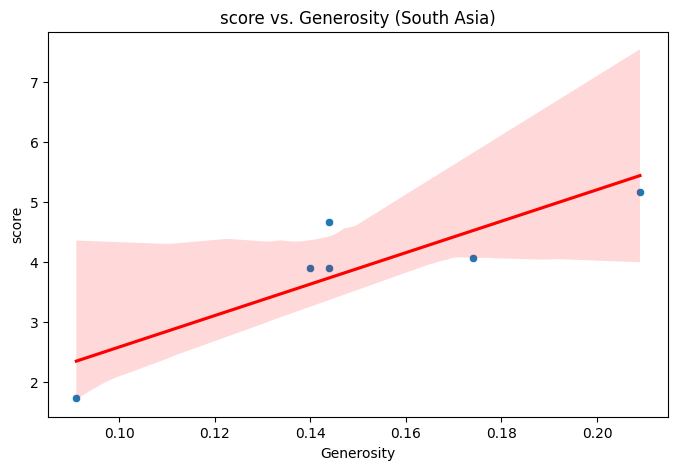

In [ ]:
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=southasia_df, x=metric, y='score')
    sns.regplot(data=southasia_df, x=metric, y='score', scatter=False, color='red')
    plt.title(f'score vs. {metric} (South Asia)')
    plt.xlabel(metric)
    plt.ylabel('score')
    plt.show()


Discuss relationships
Strongest Relationship: Identify the metric with the highest correlation coefficient and discuss its positive or negative relationship with the Score.

Weakest Relationship: Identify the metric with the lowest correlation coefficient and discuss why this might be the case.


Task -5 Gap Analysis i) Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
southasia_df['gdp_score_gap'] = southasia_df['Log GDP per capita'] - southasia_df['score']
print(southasia_df[['Country name', 'gdp_score_gap']])


    Country name  gdp_score_gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
142  Afghanistan         -1.093


ii) Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
ranked_ascending = southasia_df[['Country name', 'gdp_score_gap']].sort_values(by='gdp_score_gap')
ranked_descending = southasia_df[['Country name', 'gdp_score_gap']].sort_values(by='gdp_score_gap', ascending=False)
print("Ranked Ascending:\n", ranked_ascending)
print("Ranked Descending:\n", ranked_descending)


Ranked Ascending:
     Country name  gdp_score_gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
Ranked Descending:
     Country name  gdp_score_gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


iii) Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

<ipython-input-63-a49a584446d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='gdp_score_gap', data=pd.concat([top_positive_gaps, top_negative_gaps]), palette='viridis')


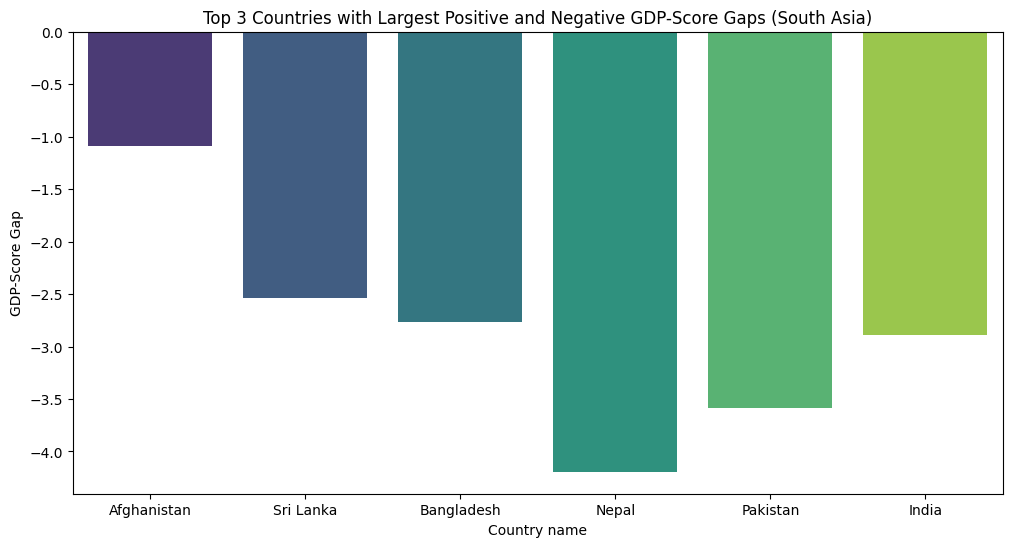

In [ ]:
top_positive_gaps = ranked_descending.head(3)
top_negative_gaps = ranked_ascending.head(3)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='gdp_score_gap', data=pd.concat([top_positive_gaps, top_negative_gaps]), palette='viridis')
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps (South Asia)')
plt.xlabel('Country name')
plt.ylabel('GDP-Score Gap')
plt.show()


Analyze gaps and implications
Positive Gaps: Countries with high GDP per capita but lower scores might indicate economic wealth not translating to higher happiness scores.

Negative Gaps: Countries with low GDP per capita but higher scores might suggest other factors contribute significantly to their happiness, such as social support or freedom to make life choices.


Task 1: Setup Task - Preparing the Middle Eastern Dataset
 1: Define the countries in the Middle East

In [ ]:
middleeastcountries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                        "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                        "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]


2. Filter the dataset to include only these countries

In [ ]:
middleeastdata = df[df['Country name'].isin(middleeastcountries)]
print(middleeastdata)


             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

3:Save the filtered dataframe as a separate CSV file

In [ ]:
middleeastdata.to_csv('MiddleEastHappinessReport.csv', index=False)



1. Descriptive Statistics
Calculate the mean and standard deviation of the Score for both South Asia and the Middle East.

Determine which region has higher happiness Scores on average.

In [ ]:
# Calculate mean and standard deviation of Score for South Asia
southasiamean = southasia_df['score'].mean()
southasiastd = southasia_df['score'].std()

# Calculate mean and standard deviation of Score for Middle East
middleeastmean = middleeastdata['score'].mean()
middleeaststd = middleeastdata['score'].std()

print(f"South Asia Mean Score: {southasiamean}, Standard Deviation: {southasiastd}")
print(f"Middle East Mean Score: {middleeastmean}, Standard Deviation: {middleeaststd}")

# Compare which region has higher happiness Scores on average
if southasiamean > middleeastmean:
    print("South Asia has higher happiness Scores on average.")
else:
    print("Middle East has higher happiness Scores on average.")


South Asia Mean Score: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has higher happiness Scores on average.


2. Top and Bottom Performers
Identify the top 3 and bottom 3 countries in each region based on the Score.

Plot bar charts comparing these charts.

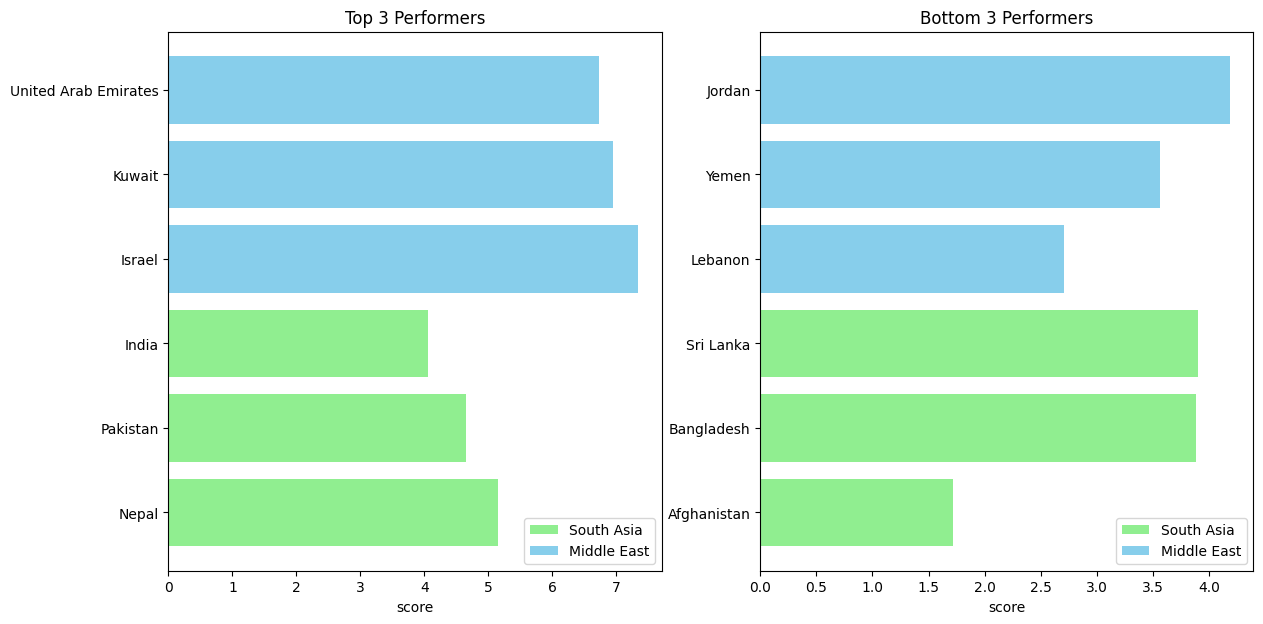

In [ ]:
# Identify top 3 and bottom 3 countries in South Asia based on Score
top3southasia = southasia_df.nlargest(3, 'score')
bottom3southasia = southasia_df.nsmallest(3, 'score')

# Identify top 3 and bottom 3 countries in Middle East based on Score
top3middleeast = middleeastdata.nlargest(3, 'score')
bottom3middleeast = middleeastdata.nsmallest(3, 'score')

# Plot bar charts comparing top and bottom performers
plt.figure(figsize=(14, 7))

# Top Performers
plt.subplot(1, 2, 1)
plt.barh(top3southasia['Country name'], top3southasia['score'], color='lightgreen', label='South Asia')
plt.barh(top3middleeast['Country name'], top3middleeast['score'], color='skyblue', label='Middle East')
plt.xlabel('score')
plt.title('Top 3 Performers')
plt.legend()

# Bottom Performers
plt.subplot(1, 2, 2)
plt.barh(bottom3southasia['Country name'], bottom3southasia['score'], color='lightgreen', label='South Asia')
plt.barh(bottom3middleeast['Country name'], bottom3middleeast['score'], color='skyblue', label='Middle East')
plt.xlabel('score')
plt.title('Bottom 3 Performers')
plt.legend()
plt.show()


3. Metric Comparisons
Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

Identify which metrics show the largest disparity between the two regions.


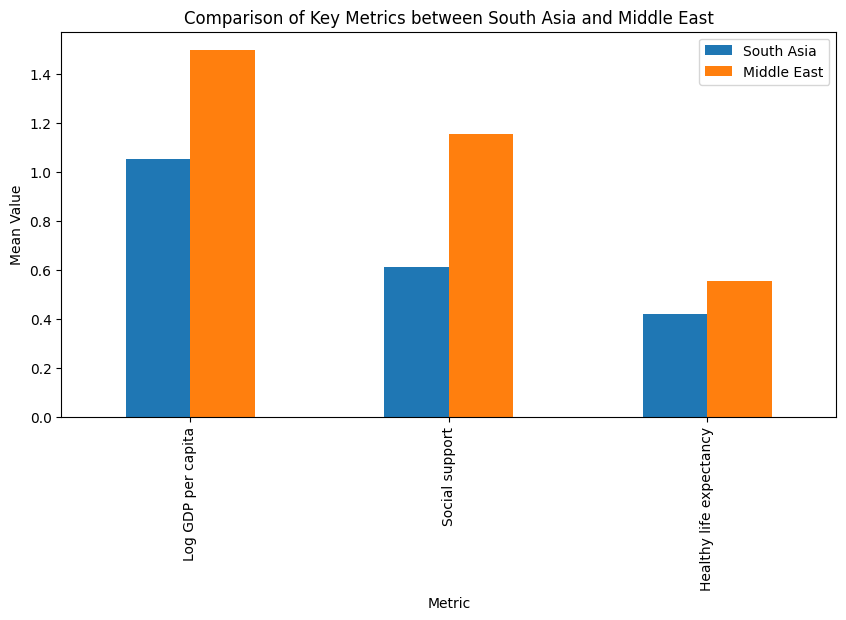

The metric with the largest disparity between the two regions is: Social support


In [ ]:
# Calculate mean of key metrics for South Asia
southasiagdpmean = southasia_df['Log GDP per capita'].mean()
southasiasocialmean = southasia_df['Social support'].mean()
southasiahealthmean = southasia_df['Healthy life expectancy'].mean()

# Calculate mean of key metrics for Middle East
middleeastgdpmean = middleeastdata['Log GDP per capita'].mean()
middleeastsocialmean = middleeastdata['Social support'].mean()
middleeasthealthmean = middleeastdata['Healthy life expectancy'].mean()

# Create a DataFrame for comparison
comparisondata = pd.DataFrame({
    'Metric': ['Log GDP per capita', 'Social support', 'Healthy life expectancy'],
    'South Asia': [southasiagdpmean, southasiasocialmean, southasiahealthmean],
    'Middle East': [middleeastgdpmean, middleeastsocialmean, middleeasthealthmean]
})

# Plot grouped bar charts
comparisondata.plot(x='Metric', kind='bar', figsize=(10, 5))
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Mean Value')
plt.show()

# Identify largest disparity
disparity = comparisondata.set_index('Metric').diff(axis=1)['Middle East'].abs()
largestdisparitymetric = disparity.idxmax()
print(f"The metric with the largest disparity between the two regions is: {largestdisparitymetric}")


4. Happiness Disparity
Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

Determine which region has greater variability in happiness.

In [ ]:
# Compute range and CV for South Asia
southasiarange = southasia_df['score'].max() - southasia_df['score'].min()
southasiacv = (southasiastd / southasiamean) * 100

# Compute range and CV for Middle East
middleeastrange = middleeastdata['score'].max() - middleeastdata['score'].min()
middleeastcv = (middleeaststd / middleeastmean) * 100

print(f"South Asia Score Range: {southasiarange}, Coefficient of Variation: {southasiacv}%")
print(f"Middle East Score Range: {middleeastrange}, Coefficient of Variation: {middleeastcv}%")

# Compare variability
if southasiacv > middleeastcv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


South Asia Score Range: 3.4370000000000003, Coefficient of Variation: 30.21482883337427%
Middle East Score Range: 4.634, Coefficient of Variation: 28.938880812119404%
South Asia has greater variability in happiness.


5. Correlation Analysis
Analyze the correlation of Score with other metrics (Freedom to Make Life Choices and Generosity) within each region.

Create scatter plots to visualize and interpret the relationships.

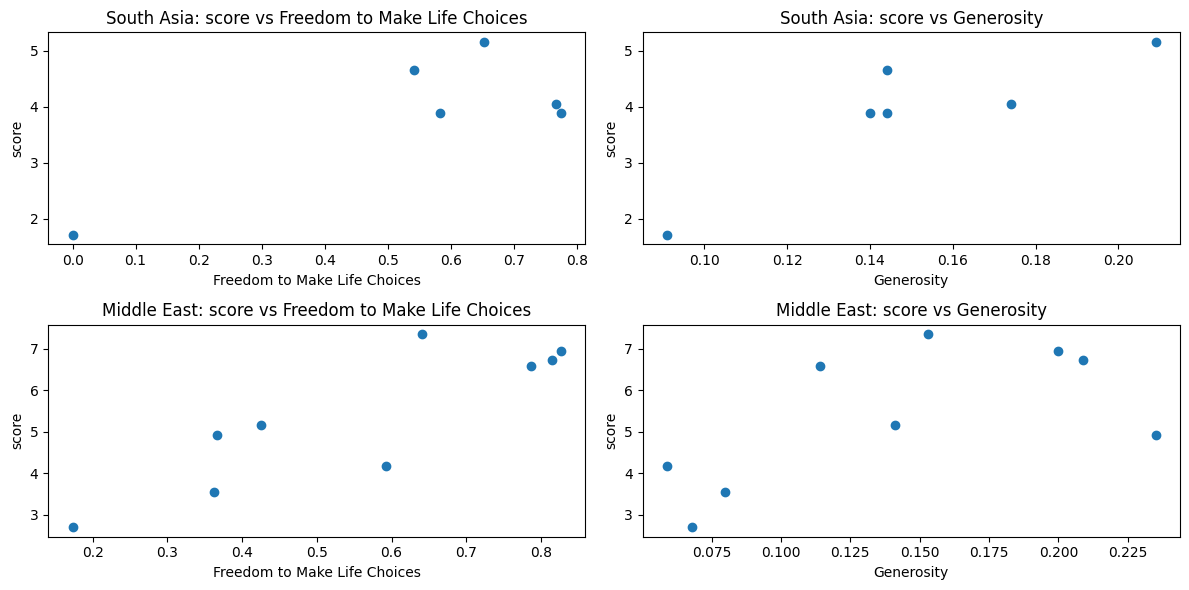

In [ ]:
# Correlation in South Asia
southasiacorrfreedom = southasia_df['score'].corr(southasia_df['Freedom to make life choices'])
southasiacorrgenerosity = southasia_df['score'].corr(southasia_df['Generosity'])
# Correlation in Middle East
middleeastcorrfreedom = middleeastdata['score'].corr(middleeastdata['Freedom to make life choices'])
middleeastcorrgenerosity = middleeastdata['score'].corr(middleeastdata['Generosity'])
# Scatter plots
plt.figure(figsize=(12, 6))
# South Asia - Freedom to Make Life Choices
plt.subplot(2, 2, 1)
plt.scatter(southasia_df['Freedom to make life choices'], southasia_df['score'])
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('score')
plt.title('South Asia: score vs Freedom to Make Life Choices')
# South Asia - Generosity
plt.subplot(2, 2, 2)
plt.scatter(southasia_df['Generosity'], southasia_df['score'])
plt.xlabel('Generosity')
plt.ylabel('score')
plt.title('South Asia: score vs Generosity')
# Middle East - Freedom to Make Life Choices
plt.subplot(2, 2, 3)
plt.scatter(middleeastdata['Freedom to make life choices'], middleeastdata['score'])
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('score')
plt.title('Middle East: score vs Freedom to Make Life Choices')
# Middle East - Generosity
plt.subplot(2, 2, 4)
plt.scatter(middleeastdata['Generosity'], middleeastdata['score'])
plt.xlabel('Generosity')
plt.ylabel('score')
plt.title('Middle East: score vs Generosity')
plt.tight_layout()
plt.show()

6: Outlier Detection
Identify outlier countries in both regions based on Score and GDP per Capita

In [ ]:
# Identify outliers in South Asia based on Score and GDP per Capita
southasia_outliers_score = identify_outliers(southasia_df, 'score')
southasia_outliers_gdp = identify_outliers(southasia_df, 'Log GDP per capita')

# Identify outliers in Middle East based on Score and GDP per Capita
middleeast_outliers_score = identify_outliers(middleeastdata, 'score')
middleeast_outliers_gdp = identify_outliers(middleeastdata, 'Log GDP per capita')

print("South Asia Outliers - score:")
print(southasia_outliers_score[['Country name', 'score']])

print("South Asia Outliers - Log GDP per Capita:")
print(southasia_outliers_gdp[['Country name', 'Log GDP per capita']])

print("Middle East Outliers - score:")
print(middleeast_outliers_score[['Country name', 'score']])

print("Middle East Outliers - Log GDP per Capita:")
print(middleeast_outliers_gdp[['Country name', 'Log GDP per capita']])


South Asia Outliers - score:
    Country name  score
142  Afghanistan  1.721
South Asia Outliers - Log GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628
Middle East Outliers - score:
Empty DataFrame
Columns: [Country name, score]
Index: []
Middle East Outliers - Log GDP per Capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


plotting

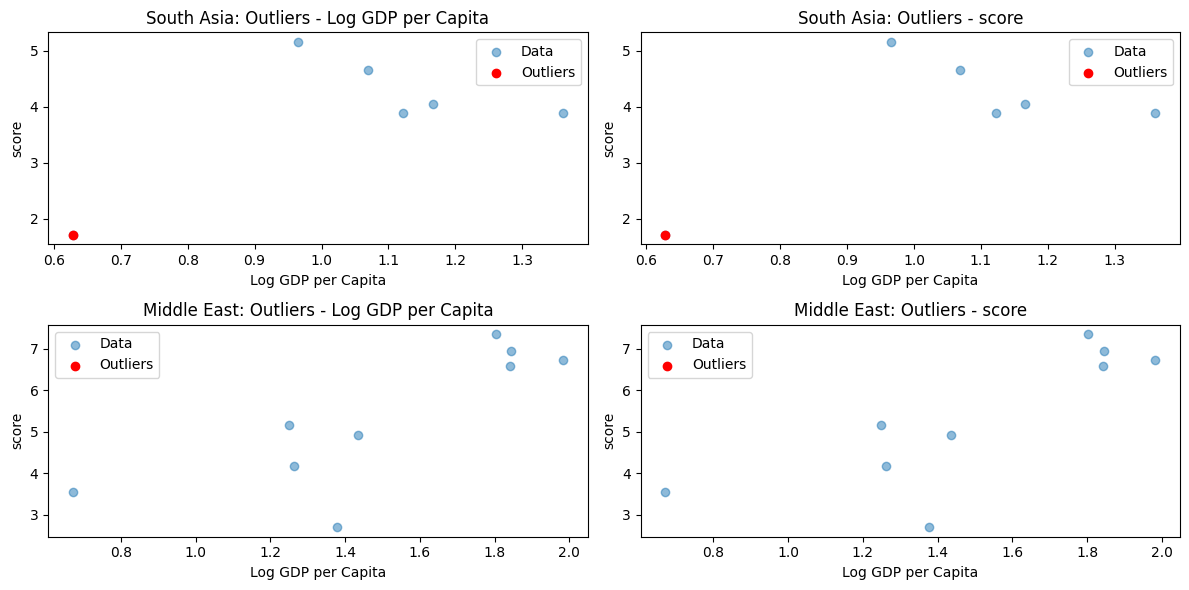

In [ ]:
# Plot outliers for South Asia
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(southasia_df['Log GDP per capita'], southasia_df['score'], label='Data', alpha=0.5)
plt.scatter(southasia_outliers_gdp['Log GDP per capita'], southasia_outliers_gdp['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.title('South Asia: Outliers - Log GDP per Capita')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(southasia_df['Log GDP per capita'], southasia_df['score'], label='Data', alpha=0.5)
plt.scatter(southasia_outliers_score['Log GDP per capita'], southasia_outliers_score['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.title('South Asia: Outliers - score')
plt.legend()

# Plot outliers for Middle East
plt.subplot(2, 2, 3)
plt.scatter(middleeastdata['Log GDP per capita'], middleeastdata['score'], label='Data', alpha=0.5)
plt.scatter(middleeast_outliers_gdp['Log GDP per capita'], middleeast_outliers_gdp['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.title('Middle East: Outliers - Log GDP per Capita')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(middleeastdata['Log GDP per capita'], middleeastdata['score'], label='Data', alpha=0.5)
plt.scatter(middleeast_outliers_score['Log GDP per capita'], middleeast_outliers_score['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.title('Middle East: Outliers - score')
plt.legend()
plt.tight_layout()
plt.show()


7. Visualization  i)Create boxplots comparing the distribution of Score between South Asia and the Middle East.

<ipython-input-79-78c2b34b8b2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middleeastdata['Region'] = 'Middle East'


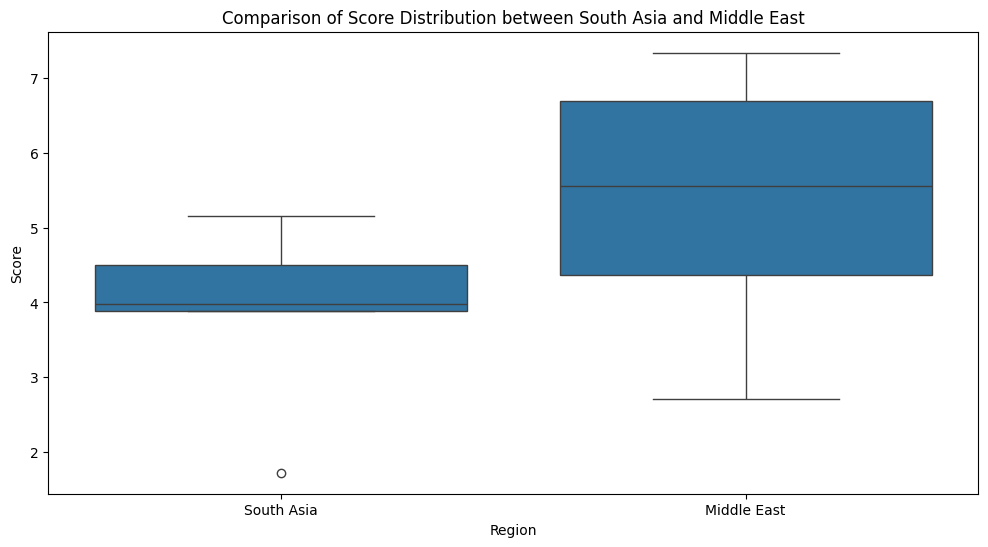

In [ ]:
import seaborn as sns
# Adding a 'Region' column to distinguish between the two datasets
southasia_df['Region'] = 'South Asia'
middleeastdata['Region'] = 'Middle East'

# Concatenate the two dataframes
combined_df = pd.concat([southasia_df, middleeastdata])

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Comparison of Score Distribution between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()


Interpreting the Boxplots
Once we run this code, we will get boxplots for the 'Score' ranges in South Asia and the Middle East. Here's how to understand them:

Distribution Shapes:

South Asia: lets Look at the spread of the data, the appearance of any outliers (individual spots outside the boxplot edges), and the general distribution shape.

Middle East: Similarly, we can notice the distribution's spread, any exceptions, and how the numbers are distributed.

Medians:

The line inside each box shows the midpoint of the statistics. we can Compare the median 'Score' for South Asia and the Middle East to see which area has better or lower central tendency scores.

Outliers:

Points outside the lines are called outliers. Identify the number and spread of outliers for each area. This can give insights into the variations and odd findings in the data.

Overall Comparison:

We can ompare the lengths of the boxes to understand the interquartile range (IQR) and total variability.

We can Check if there is agreement in the score distributions between the two areas.
